### Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sktime as sk
from sktime.forecasting.arima import ARIMA
from sktime.forecasting.arima import AutoARIMA
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sktime.forecasting.compose import make_reduction
from sktime.transformations.series.detrend import Detrender,Deseasonalizer
from sktime.forecasting.base import ForecastingHorizon
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.forecasting.theta import ThetaForecaster
from sktime.utils.plotting import plot_series
from sktime.forecasting.ets import AutoETS
from sktime.performance_metrics.forecasting import MeanRelativeAbsoluteError
from sktime.performance_metrics.forecasting import MeanSquaredScaledError
from sktime.performance_metrics.forecasting import GeometricMeanAbsoluteError
from codes import *
rmsse = MeanSquaredScaledError(square_root=True)
gmae = GeometricMeanAbsoluteError()
la_models = []
pb_models = []

### Loading dataset from data folders and accessing the data variables and then reshaping it

In [2]:
train_data1 = np.load('data/METR-LA/train.npz')
train_data2 = np.load('data/PEMS-BAY/train.npz')
y_train1 = train_data1['y']
y_train1 = reshape_func(y_train1)
y_train1 = y_train1[:,0]
y_train1 = pd.DataFrame(y_train1)
y_train2 = train_data2['y']
y_train2 = reshape_func(y_train2)
y_train2 = y_train2[:,0]
y_train2 = pd.DataFrame(y_train2)

### Here we load the same variables from the test data and reshape them according to the same process for us to use.

In [3]:
test_data1 = np.load('data/METR-LA/test.npz')
y_test1 = test_data1['y']
y_test1 = reshape_func(y_test1)
y_test1 = y_test1[:,0]
y_test1 =  pd.DataFrame(y_test1)
test_data2 = np.load('data/PEMS-BAY/test.npz')
y_test2 = test_data2['y']
y_test2 = reshape_func(y_test2)
y_test2 = y_test2[:,0]
y_test2 =  pd.DataFrame(y_test2)

### Here we try some SKTIME basic models

In [4]:
la_model1 = model(y_train1,y_test1,ThetaForecaster(deseasonalize = False),False)
pb_model1 = model(y_train2,y_test2,ThetaForecaster(deseasonalize = False),False)

la_models.append(la_model1)
pb_models.append(pb_model1)
#plot_series(pb_model1[3][0::1000],y_test2[0::1000],labels = ["y_pred","y_test"])
#plot_series(la_model1[3][0::1000],y_test1[0::1000],labels = ["y_pred","y_test"])



### To reduce error due to zero speeds, let's make some changes to the training and testing data
### We impute the zero speeds with last known value (the function can be found in codes.py file)


In [5]:
ytrain_zfill1 = fillzeros(y_train1)
ytest_zfill1 = fillzeros(y_test1)

ytrain_zfill2 = fillzeros(y_train2)
ytest_zfill2 = fillzeros(y_test2)

la_model2 = model(ytrain_zfill1,ytest_zfill1,ThetaForecaster(deseasonalize=False),False)
pb_model2 = model(ytrain_zfill2,ytest_zfill2,ThetaForecaster(deseasonalize=False),False)

la_models.append(la_model2)
pb_models.append(pb_model2)


### We try to remove the trend and seasonality

In [6]:
la_model3 = model(ytrain_zfill1,ytest_zfill1,ThetaForecaster(deseasonalize=False),True)
pb_model3 = model(ytrain_zfill2,ytest_zfill2,ThetaForecaster(deseasonalize=False),True)

la_models.append(la_model3)
pb_models.append(pb_model3)

In [7]:
la_model4 = model(y_train1,y_test1,ThetaForecaster(deseasonalize=False),True)
pb_model4 = model(y_train2,y_test2,ThetaForecaster(deseasonalize=False),True)
la_models.append(la_model4)
pb_models.append(pb_model4)

### Now we are going to develop some more arima models

In [8]:
la_model5 = model(y_train1,y_test1,ARIMA(),False)
pb_model5 = model(y_train2,y_test2,ARIMA(),False)
la_models.append(la_model5)
pb_models.append(pb_model5)

In [9]:
la_model6 = model(ytrain_zfill1,ytest_zfill1,ARIMA(),False)
pb_model6 = model(ytrain_zfill2,ytest_zfill2,ARIMA(),False)
la_models.append(la_model6)
pb_models.append(pb_model6)


## Now we apply autoETS models

In [10]:
la_model7 = model(y_train1,y_test1,AutoETS(auto=True),False)
pb_model7 = model(y_train2,y_test2,AutoETS(auto=True),False)
la_models.append(la_model7)
pb_models.append(pb_model7)


D:\Anaconda\envs\dcrnn\lib\site-packages\sktime\forecasting\ets.py:248: UserWarning: Warning: time series is not strictly positive,multiplicative components are ommitted
  warnings.warn(


In [11]:
la_model8 = model(ytrain_zfill1,ytest_zfill1,AutoETS(auto=True),False)
pb_model8 = model(ytrain_zfill2,ytest_zfill2,AutoETS(auto=True),False)
la_models.append(la_model8)
pb_models.append(pb_model8)

In [37]:
N = len(la_models)
smape_la = np.zeros(N)
gmae_la = np.zeros(N)
rmsse_la = np.zeros(N)

for i in range(N):
    smape_la[i] = la_models[i][0]
    rmsse_la[i] = la_models[i][1]
    gmae_la[i] = la_models[i][2]
    

In [38]:
M = len(pb_models)
smape_pb = np.zeros(M)
gmae_pb = np.zeros(M)
rmsse_pb = np.zeros(M)

for i in range(M):
    smape_pb[i] = pb_models[i][0]
    rmsse_pb[i] = pb_models[i][1]
    gmae_pb[i] = pb_models[i][2]

(<Figure size 1600x400 with 1 Axes>, <AxesSubplot:>)

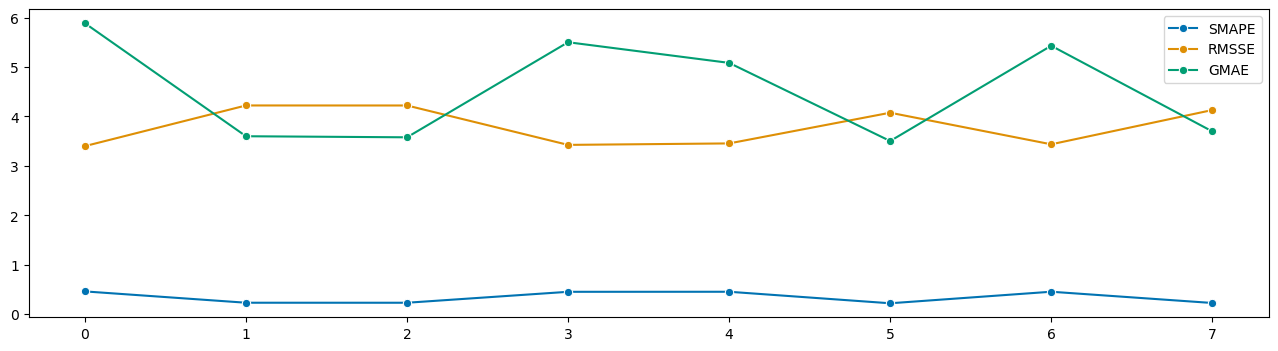

In [39]:
plot_series(pd.DataFrame(smape_la),pd.DataFrame(rmsse_la),pd.DataFrame(gmae_la),labels = ["SMAPE","RMSSE","GMAE"])

(<Figure size 1600x400 with 1 Axes>, <AxesSubplot:>)

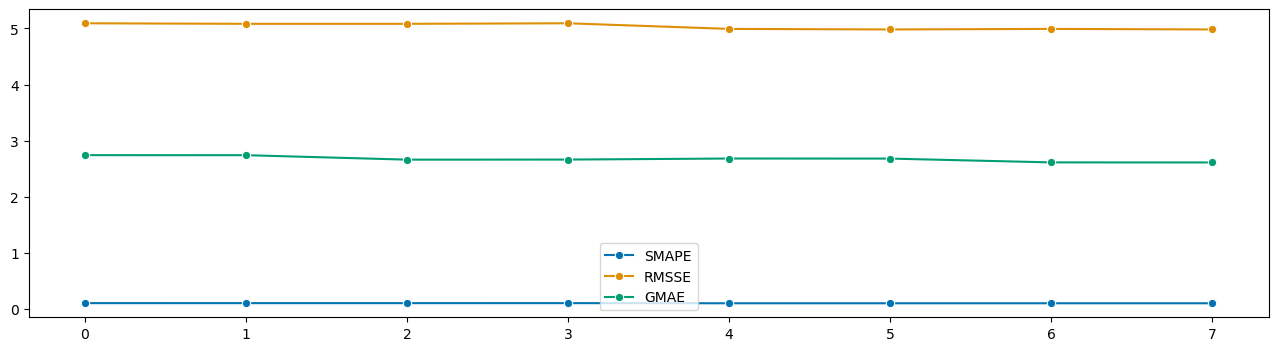

In [40]:
plot_series(pd.DataFrame(smape_pb),pd.DataFrame(rmsse_pb),pd.DataFrame(gmae_pb),labels = ["SMAPE","RMSSE","GMAE"])

In [12]:
#regressors = [LinearRegression(),DecisionTreeRegressor(),GradientBoostingRegressor()]
#smape_reg = []
#rmsse_reg = []
#ypred_reg = []
#for i in regressors:
  #  forecaster = make_reduction(i,window_length=12,strategy="recursive")
 #   [smape1,rmsse1,yped1] = model(y_train,y_test,forecaster,False)
#    smape_reg.append(smape1)
#    rmsse_reg.append(rmsse1)
#    ypred_reg.append(ypred1)
    

In [13]:
#forecaster = make_reduction(DecisionTreeRegressor())#, scitype="time-series-regressor")#strategy="recursive")
#forecaster.fit(yy_train)
#pred = forecaster.predict(fh)
#smape1 = smape(y_test,pred)
#rmsse1 = rmsse(y_test,pred,y_train=y_train)

In [14]:
#fh = ForecastingHorizon(y_test.index, is_relative=False)
#regressors = LinearRegression()
#forecaster = make_reduction(regressors,window_length=52,strategy="multioutput")
#forecaster.fit(y_train,fh)
#y_pred = forecaster.predict(fh)